## 1. Load Data

In [2]:

import numpy as np

# Load npz
data = np.load("../data/iris_4features_data.npz")

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

print(f"Training X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Validation X shape: {X_val.shape}, y shape: {y_val.shape}")
print(f"Testing X shape: {X_test.shape}, y shape: {y_test.shape}")

Training X shape: (90, 4), y shape: (90,)
Validation X shape: (30, 4), y shape: (30,)
Testing X shape: (30, 4), y shape: (30,)


## 2. Traiable Quantum Feature Map

In [3]:
#!/usr/bin/env python3
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))



In [4]:
from src.feature_map import TrainableQuantumFeatureMap as TQFM
from qiskit_algorithms.optimizers import COBYLA,SPSA, ADAM


depth = 1
optimizer = COBYLA(maxiter=100)


# Train the feature map
tqfm1 = TQFM(depth=depth, type_ansatz="RealAmplitudes")
tqfm1.fit(X_train, y_train, optimizer=optimizer)

Number of qubits: 4, Number of classes: 3
Using AerSimulator for accelerated statevector computation


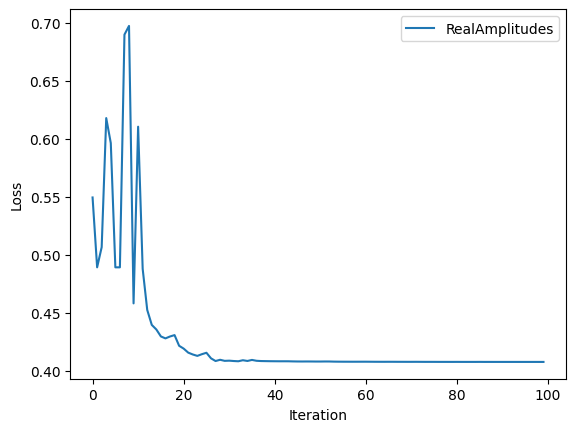

In [5]:
# draw 3 loss curves in one plot
import matplotlib.pyplot as plt
plt.plot(tqfm1.loss_history, label='RealAmplitudes')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [8]:
from src.kernel_estimate import KernelMatrix

kernel_train1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_train, X_train, tqfm1.optimal_params, tqfm1.circuit)
kernel_val1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_val, X_train, tqfm1.optimal_params, tqfm1.circuit)
kernel_test1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test, X_train, tqfm1.optimal_params, tqfm1.circuit)

In [7]:
from src.kernel_estimate import KernelMatrix

kernel_train1 = KernelMatrix.compute_kernel_matrix_with_inner_products_legacy(X_train, X_train, tqfm1.optimal_params, tqfm1.circuit)
kernel_val1 = KernelMatrix.compute_kernel_matrix_with_inner_products_legacy(X_val, X_train, tqfm1.optimal_params, tqfm1.circuit)
kernel_test1 = KernelMatrix.compute_kernel_matrix_with_inner_products_legacy(X_test, X_train, tqfm1.optimal_params, tqfm1.circuit)

KeyboardInterrupt: 

In [9]:
from src.utils import class_similarity, calculate_accuracy

val_acc, test_acc, best_c = calculate_accuracy(
	kernel_train1, kernel_val1, kernel_test1, y_train, y_val, y_test
)

print(f"Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}")

{'C': np.float64(1.501), 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'precomputed', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
15
Validation Accuracy: 0.9666666666666667, Test Accuracy: 0.9333333333333333


In [10]:
w0, w1, b, ratio = class_similarity(kernel_train1, y_train)
print(f"ratio {ratio}")

ratio 1.658999466898159


In [33]:
from src.feature_map1 import TrainableQuantumFeatureMap as TQFM1
from qiskit_algorithms.optimizers import COBYLA,SPSA, ADAM


depth = 2
optimizer = COBYLA(maxiter=1000)


# Train the feature map
tqfm4 = TQFM1(depth=depth, type_ansatz="RealAmplitudes")
tqfm4.fit(X_train, y_train, optimizer=optimizer)

tqfm5 = TQFM1(depth=depth, type_ansatz="RealAmplitudes")
tqfm5.fit(X_train, y_train, optimizer=optimizer)

tqfm6 = TQFM1(depth=depth, type_ansatz="RealAmplitudes")
tqfm6.fit(X_train, y_train, optimizer=optimizer)

Number of qubits: 4, Number of classes: 3
Number of qubits: 4, Number of classes: 3
Number of qubits: 4, Number of classes: 3


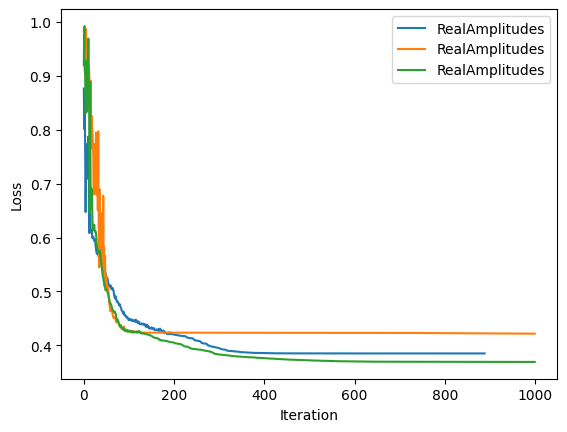

In [34]:
# draw 3 loss curves in one plot
import matplotlib.pyplot as plt
plt.plot(tqfm4.loss_history, label='RealAmplitudes')
plt.plot(tqfm5.loss_history, label='RealAmplitudes')
plt.plot(tqfm6.loss_history, label='RealAmplitudes')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [35]:
from src.kernel_estimate import KernelMatrix

kernel_train6 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_train, X_train, tqfm6.optimal_params, tqfm6.circuit)
kernel_val6 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_val, X_train, tqfm6.optimal_params, tqfm6.circuit)
kernel_test6 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test, X_train, tqfm6.optimal_params, tqfm6.circuit)

In [36]:
from src.utils import class_similarity, calculate_accuracy

val_acc, test_acc, best_c = calculate_accuracy(
	kernel_train6, kernel_val6, kernel_test6, y_train, y_val, y_test
)

print(f"Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}")

Validation Accuracy: 0.9333333333333333, Test Accuracy: 0.9333333333333333


In [37]:
w0, w1, b, ratio = class_similarity(kernel_train6, y_train)
print(f"ratio {ratio}")

ratio 2.2184633183337317


In [38]:
from sklearn.metrics.pairwise import rbf_kernel
from src.utils import calculate_accuracy

rbf_K_train = rbf_kernel(X_train)
rbf_K_val = rbf_kernel(X_val, X_train)
rbf_K_test = rbf_kernel(X_test, X_train)

classical_val_acc, classical_test_acc, _ = calculate_accuracy(
    rbf_K_train, rbf_K_val, rbf_K_test,
    y_train, y_val, y_test
)
print("Val acc | Test acc")
print(f"{classical_val_acc} | {classical_test_acc}")

Val acc | Test acc
1.0 | 0.9333333333333333
